In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pickle
import os

In [3]:
ERR_LBLS = ["CO", "GM", "LX", "OT"]

## Load Data

In [4]:
primaryPath = "/content/gdrive/My Drive/NLP/Translations/"

In [127]:
dataFolder = "xlm/final/heads/"
dataPath = primaryPath + dataFolder + "stats"

In [128]:
file_to_read = open(dataPath, "rb")

In [129]:
stats_dict = pickle.load(file_to_read)

stats_dict

{'head0': {'1000': {'CO': 1079, 'GM': 307, 'LX': 1062, 'OT': 511},
  '10000': {'CO': 1032, 'GM': 394, 'LX': 1067, 'OT': 516},
  '2000': {'CO': 1061, 'GM': 351, 'LX': 1075, 'OT': 522},
  '20000': {'CO': 1047, 'GM': 346, 'LX': 1044, 'OT': 507},
  '5000': {'CO': 910, 'GM': 459, 'LX': 1199, 'OT': 603},
  '50000': {'CO': 1038, 'GM': 384, 'LX': 1044, 'OT': 553},
  '70000': {'CO': 1074, 'GM': 355, 'LX': 1024, 'OT': 494}},
 'head1': {'1000': {'CO': 1091, 'GM': 281, 'LX': 1044, 'OT': 451},
  '10000': {'CO': 1044, 'GM': 354, 'LX': 1056, 'OT': 510},
  '2000': {'CO': 998, 'GM': 400, 'LX': 1104, 'OT': 570},
  '20000': {'CO': 1044, 'GM': 366, 'LX': 1049, 'OT': 508},
  '5000': {'CO': 1025, 'GM': 379, 'LX': 1088, 'OT': 524},
  '50000': {'CO': 1101, 'GM': 331, 'LX': 999, 'OT': 463},
  '70000': {'CO': 966, 'GM': 396, 'LX': 1115, 'OT': 554}},
 'head2': {'1000': {'CO': 1046, 'GM': 327, 'LX': 1090, 'OT': 482},
  '10000': {'CO': 1032, 'GM': 373, 'LX': 1056, 'OT': 519},
  '2000': {'CO': 1070, 'GM': 328, 'LX'

## Process Data

In [130]:
num_sentences = 2013

In [131]:
layers = (list(stats_dict.keys()))
budgets = list(stats_dict[layers[0]].keys())
layers.sort()
budgets.sort()
print("Layers:", layers)
print("Budgets:", budgets)

Layers: ['head0', 'head1', 'head2', 'head3', 'head4', 'head5', 'head6', 'head7']
Budgets: ['1000', '10000', '2000', '20000', '5000', '50000', '70000']


In [132]:
budgets = ['2000', '5000', '10000', '20000']

In [133]:
# change format of dict to per budget - per layer
data = {}

for budget in budgets:
  d = {}
  for layer in layers:
    d[layer] = stats_dict[layer][budget]
  
  data[budget] = d

In [134]:
data

{'10000': {'head0': {'CO': 1032, 'GM': 394, 'LX': 1067, 'OT': 516},
  'head1': {'CO': 1044, 'GM': 354, 'LX': 1056, 'OT': 510},
  'head2': {'CO': 1032, 'GM': 373, 'LX': 1056, 'OT': 519},
  'head3': {'CO': 1028, 'GM': 386, 'LX': 1068, 'OT': 567},
  'head4': {'CO': 1021, 'GM': 393, 'LX': 1086, 'OT': 508},
  'head5': {'CO': 1049, 'GM': 381, 'LX': 1069, 'OT': 526},
  'head6': {'CO': 989, 'GM': 395, 'LX': 1128, 'OT': 557},
  'head7': {'CO': 1040, 'GM': 390, 'LX': 1079, 'OT': 515}},
 '2000': {'head0': {'CO': 1061, 'GM': 351, 'LX': 1075, 'OT': 522},
  'head1': {'CO': 998, 'GM': 400, 'LX': 1104, 'OT': 570},
  'head2': {'CO': 1070, 'GM': 328, 'LX': 1050, 'OT': 427},
  'head3': {'CO': 929, 'GM': 432, 'LX': 1192, 'OT': 569},
  'head4': {'CO': 888, 'GM': 486, 'LX': 1204, 'OT': 636},
  'head5': {'CO': 921, 'GM': 439, 'LX': 1187, 'OT': 601},
  'head6': {'CO': 1018, 'GM': 390, 'LX': 1087, 'OT': 531},
  'head7': {'CO': 1058, 'GM': 342, 'LX': 1062, 'OT': 501}},
 '20000': {'head0': {'CO': 1047, 'GM': 346

### Conversions

In [135]:
# per layer per budget

if not os.path.exists(primaryPath + dataFolder + "layer_stats/"):
    os.mkdir(primaryPath + dataFolder + "layer_stats/")
for layer in layers:
  output_dict = {}
  for budget in budgets:
    output_dict[budget] = data[budget][layer]
  output_data_df = pd.DataFrame(output_dict)
  output_data_df.to_csv(primaryPath+dataFolder+"layer_stats/"+layer+"_stats.csv")

In [136]:
# per budget per layer

if not os.path.exists(primaryPath + dataFolder + "budget_stats/"):
    os.mkdir(primaryPath + dataFolder + "budget_stats/")
for budget in budgets:
  output_dict = {}
  for layer in layers:
    output_dict[layer] = data[budget][layer]
  output_data_df = pd.DataFrame(output_dict)
  output_data_df.to_csv(primaryPath+dataFolder+"budget_stats/"+budget+"_stats.csv")

In [137]:
# overall per layer per budget 
layer_cols = ['layer'] + budgets 
overall_df_layers  = pd.DataFrame(columns = layer_cols) 
print(overall_df_layers)
for layer in layers:
  output_dict = {}
  for budget in budgets:
    output_dict[budget] = data[budget][layer]
  output_data_df = pd.DataFrame.from_dict(output_dict)
  output_data_df['layer'] = layer
  overall_df_layers = overall_df_layers.append(output_data_df)

overall_df_layers.reset_index(inplace=True)
overall_df_layers.rename(columns={"index":"err"}, inplace=True)

print("Finished-------------------")
print(overall_df_layers)

overall_df_layers.to_csv(primaryPath+dataFolder+"layer_stats/overall_stats.csv")

Empty DataFrame
Columns: [layer, 2000, 5000, 10000, 20000]
Index: []
Finished-------------------
   err  layer  2000  5000 10000 20000
0   CO  head0  1061   910  1032  1047
1   GM  head0   351   459   394   346
2   LX  head0  1075  1199  1067  1044
3   OT  head0   522   603   516   507
4   CO  head1   998  1025  1044  1044
5   GM  head1   400   379   354   366
6   LX  head1  1104  1088  1056  1049
7   OT  head1   570   524   510   508
8   CO  head2  1070   928  1032  1094
9   GM  head2   328   460   373   341
10  LX  head2  1050  1176  1056  1010
11  OT  head2   427   592   519   485
12  CO  head3   929   956  1028  1154
13  GM  head3   432   415   386   319
14  LX  head3  1192  1160  1068   952
15  OT  head3   569   586   567   487
16  CO  head4   888   921  1021  1048
17  GM  head4   486   446   393   376
18  LX  head4  1204  1171  1086  1048
19  OT  head4   636   617   508   534
20  CO  head5   921   942  1049  1097
21  GM  head5   439   436   381   341
22  LX  head5  1187  1159  10

In [138]:
# overall per layer per budget 
budget_cols = ['budget'] + layers 
overall_df_budgets  = pd.DataFrame(columns = budget_cols) 
print(overall_df_budgets)
for budget in budgets:
  output_dict = {}
  for layer in layers:
    output_dict[layer] = data[budget][layer]
  output_data_df = pd.DataFrame.from_dict(output_dict)
  output_data_df['budget'] = budget
  overall_df_budgets = overall_df_budgets.append(output_data_df)

overall_df_budgets.reset_index(inplace=True)
overall_df_budgets.rename(columns={"index":"err"}, inplace=True)

print("Finished-------------------")
print(overall_df_budgets)
overall_df_budgets.to_csv(primaryPath+dataFolder+"budget_stats/overall_stats.csv")

Empty DataFrame
Columns: [budget, head0, head1, head2, head3, head4, head5, head6, head7]
Index: []
Finished-------------------
   err budget head0 head1 head2 head3 head4 head5 head6 head7
0   CO   2000  1061   998  1070   929   888   921  1018  1058
1   GM   2000   351   400   328   432   486   439   390   342
2   LX   2000  1075  1104  1050  1192  1204  1187  1087  1062
3   OT   2000   522   570   427   569   636   601   531   501
4   CO   5000   910  1025   928   956   921   942   962   985
5   GM   5000   459   379   460   415   446   436   406   400
6   LX   5000  1199  1088  1176  1160  1171  1159  1163  1135
7   OT   5000   603   524   592   586   617   574   559   571
8   CO  10000  1032  1044  1032  1028  1021  1049   989  1040
9   GM  10000   394   354   373   386   393   381   395   390
10  LX  10000  1067  1056  1056  1068  1086  1069  1128  1079
11  OT  10000   516   510   519   567   508   526   557   515
12  CO  20000  1047  1044  1094  1154  1048  1097  1132  1018
13  

## Plot Data

In [139]:
mod_layers = ["head"+str(i) for i in range(1,len(layers)+1)]
mod_layers

['head1', 'head2', 'head3', 'head4', 'head5', 'head6', 'head7', 'head8']

### Plot per Budget Per Error %

In [140]:
data

{'10000': {'head0': {'CO': 1032, 'GM': 394, 'LX': 1067, 'OT': 516},
  'head1': {'CO': 1044, 'GM': 354, 'LX': 1056, 'OT': 510},
  'head2': {'CO': 1032, 'GM': 373, 'LX': 1056, 'OT': 519},
  'head3': {'CO': 1028, 'GM': 386, 'LX': 1068, 'OT': 567},
  'head4': {'CO': 1021, 'GM': 393, 'LX': 1086, 'OT': 508},
  'head5': {'CO': 1049, 'GM': 381, 'LX': 1069, 'OT': 526},
  'head6': {'CO': 989, 'GM': 395, 'LX': 1128, 'OT': 557},
  'head7': {'CO': 1040, 'GM': 390, 'LX': 1079, 'OT': 515}},
 '2000': {'head0': {'CO': 1061, 'GM': 351, 'LX': 1075, 'OT': 522},
  'head1': {'CO': 998, 'GM': 400, 'LX': 1104, 'OT': 570},
  'head2': {'CO': 1070, 'GM': 328, 'LX': 1050, 'OT': 427},
  'head3': {'CO': 929, 'GM': 432, 'LX': 1192, 'OT': 569},
  'head4': {'CO': 888, 'GM': 486, 'LX': 1204, 'OT': 636},
  'head5': {'CO': 921, 'GM': 439, 'LX': 1187, 'OT': 601},
  'head6': {'CO': 1018, 'GM': 390, 'LX': 1087, 'OT': 531},
  'head7': {'CO': 1058, 'GM': 342, 'LX': 1062, 'OT': 501}},
 '20000': {'head0': {'CO': 1047, 'GM': 346

In [141]:
# calculate budget layer error sums
sums_error = {}

for budget in data:
  sums_error[budget]= {}
  for layer in data[budget]:
    
    sum = 0
    for err in data[budget][layer]:
      sum+= data[budget][layer][err]
    sums_error[budget][layer] = sum

sums_error

{'10000': {'head0': 3009,
  'head1': 2964,
  'head2': 2980,
  'head3': 3049,
  'head4': 3008,
  'head5': 3025,
  'head6': 3069,
  'head7': 3024},
 '2000': {'head0': 3009,
  'head1': 3072,
  'head2': 2875,
  'head3': 3122,
  'head4': 3214,
  'head5': 3148,
  'head6': 3026,
  'head7': 2963},
 '20000': {'head0': 2944,
  'head1': 2967,
  'head2': 2930,
  'head3': 2912,
  'head4': 3006,
  'head5': 2911,
  'head6': 2929,
  'head7': 3019},
 '5000': {'head0': 3171,
  'head1': 3016,
  'head2': 3156,
  'head3': 3117,
  'head4': 3155,
  'head5': 3111,
  'head6': 3090,
  'head7': 3091}}

In [143]:
# plot per budget, different layers on the x axis and error qty on y-axis. Each point on x-axis has 4 bars for each error label 
def plot_budget_per_error(budget, budget_label, budget_sums):

  barWidth = 0.4
  bars = [[ (budget[layer][err]/budget_sums[layer])*100 for layer in layers] for err in ERR_LBLS]
  
  # set pos in x axis
  r = []
  for i in range(len(bars)):
    if i==0:
      r.append(np.arange(len(bars[0]))*2)
    else:
      r.append([x + barWidth for x in r[i-1]])

  colors = []
  
  for i in range(len(bars)):
    plt.bar(r[i], bars[i], width=barWidth, edgecolor = "k",label=ERR_LBLS[i])

  # add x ticks
  plt.xlabel('Transformer Heads', fontweight='bold')
  plt.ylabel("% of Errors", fontweight="bold")
  plt.xticks([2*(r + barWidth) for r in range(len(bars[0]))], mod_layers) # use rotation for best/ 
  plt.ylim(top=100)
  plt.legend()
  plt.tight_layout()
  if not os.path.exists(primaryPath + dataFolder + "img/"):
    os.mkdir(primaryPath + dataFolder + "img/")
  plt.savefig(primaryPath+dataFolder+"img/"+"error_sums_budget_" + budget_label+".pdf")
  plt.show()


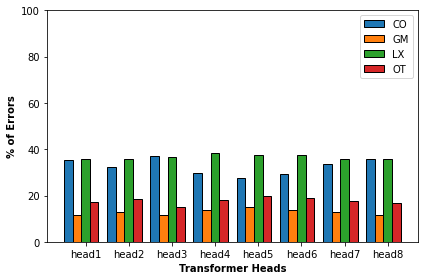

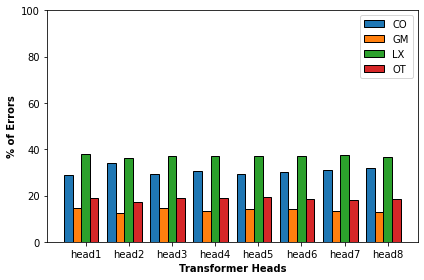

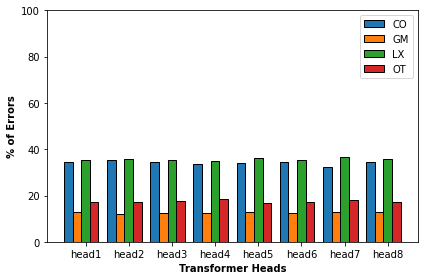

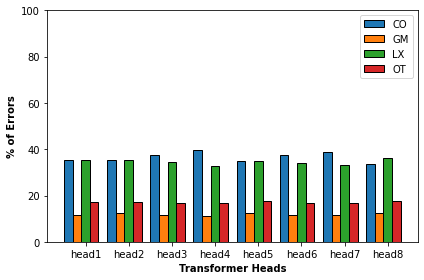

In [144]:
for budget in budgets:
  plot_budget_per_error(data[budget], budget, sums_error[budget])

### Plot per Budget Per Sentence %

In [145]:
data

{'10000': {'head0': {'CO': 1032, 'GM': 394, 'LX': 1067, 'OT': 516},
  'head1': {'CO': 1044, 'GM': 354, 'LX': 1056, 'OT': 510},
  'head2': {'CO': 1032, 'GM': 373, 'LX': 1056, 'OT': 519},
  'head3': {'CO': 1028, 'GM': 386, 'LX': 1068, 'OT': 567},
  'head4': {'CO': 1021, 'GM': 393, 'LX': 1086, 'OT': 508},
  'head5': {'CO': 1049, 'GM': 381, 'LX': 1069, 'OT': 526},
  'head6': {'CO': 989, 'GM': 395, 'LX': 1128, 'OT': 557},
  'head7': {'CO': 1040, 'GM': 390, 'LX': 1079, 'OT': 515}},
 '2000': {'head0': {'CO': 1061, 'GM': 351, 'LX': 1075, 'OT': 522},
  'head1': {'CO': 998, 'GM': 400, 'LX': 1104, 'OT': 570},
  'head2': {'CO': 1070, 'GM': 328, 'LX': 1050, 'OT': 427},
  'head3': {'CO': 929, 'GM': 432, 'LX': 1192, 'OT': 569},
  'head4': {'CO': 888, 'GM': 486, 'LX': 1204, 'OT': 636},
  'head5': {'CO': 921, 'GM': 439, 'LX': 1187, 'OT': 601},
  'head6': {'CO': 1018, 'GM': 390, 'LX': 1087, 'OT': 531},
  'head7': {'CO': 1058, 'GM': 342, 'LX': 1062, 'OT': 501}},
 '20000': {'head0': {'CO': 1047, 'GM': 346

In [146]:
# plot per budget, different layers on the x axis and error qty on y-axis. Each point on x-axis has 4 bars for each error label 
def plot_budget_per_sentence(budget, budget_label, sum_sentences):

  barWidth = 0.4
  bars = [[ (budget[layer][err]/sum_sentences)*100 for layer in layers] for err in ERR_LBLS]
  
  # set pos in x axis
  r = []
  for i in range(len(bars)):
    if i==0:
      r.append(np.arange(len(bars[0]))*2)
    else:
      r.append([x + barWidth for x in r[i-1]])

  colors = []
  
  for i in range(len(bars)):
    plt.bar(r[i], bars[i], width=barWidth, edgecolor = "k",label=ERR_LBLS[i])

  # add x ticks
  plt.xlabel('Transformer Heads', fontweight='bold')
  plt.ylabel("% of Sentences", fontweight="bold")
  plt.xticks([2*(r + barWidth) for r in range(len(bars[0]))], mod_layers) # use rotation for best/ 
  plt.ylim(top=100)
  plt.legend()
  plt.tight_layout()
  if not os.path.exists(primaryPath + dataFolder + "img/"):
    os.mkdir(primaryPath + dataFolder + "img/")
  plt.savefig(primaryPath+dataFolder+"img/"+"sentence_per_budget_" + budget_label+".pdf")
  plt.show()


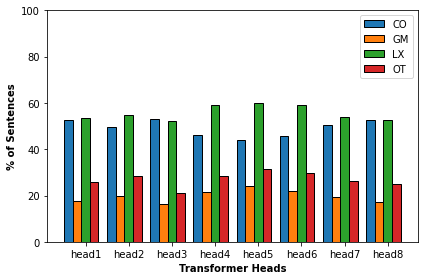

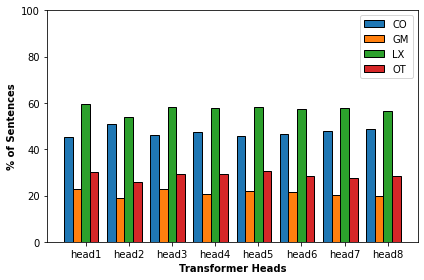

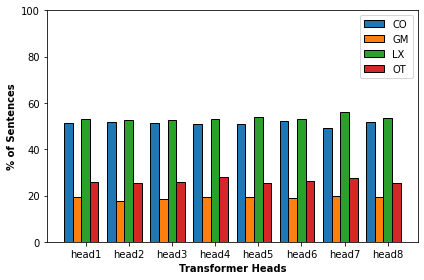

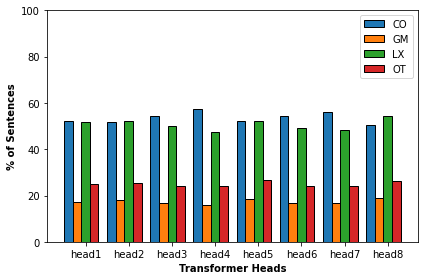

In [147]:
for budget in budgets:
  plot_budget_per_sentence(data[budget], budget, num_sentences)